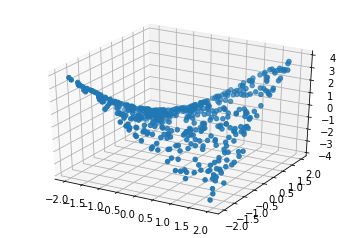

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# NOTE: some people using the default Python
# installation on Mac have had trouble with Axes3D
# Switching to Python 3 (brew install python3) or
# using Linux are both viable work-arounds





# generate and plot the data
N = 500
X = np.random.random((N, 2))*4 - 2 # in between (-2, +2)
Y = X[:,0]*X[:,1] # makes a saddle shape
# note: in this script "Y" will be the target,
#       "Yhat" will be prediction

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
plt.show()

In [2]:
# make a neural network and train it
D = 2
M = 100 # number of hidden units

# layer 1
W = np.random.randn(D, M) / np.sqrt(D)
b = np.zeros(M)

# layer 2
V = np.random.randn(M) / np.sqrt(M)
c = 0

In [5]:
# how to get the output
# consider the params global
def forward(X):
  Z = X.dot(W) + b
  Z = Z * (Z > 0) # relu
  # Z = np.tanh(Z)

  Yhat = Z.dot(V) + c
  return Z, Yhat

In [6]:
# how to train the params
def derivative_V(Z, Y, Yhat):
  return (Y - Yhat).dot(Z)

def derivative_c(Y, Yhat):
  return (Y - Yhat).sum()

def derivative_W(X, Z, Y, Yhat, V):
  # dZ = np.outer(Y - Yhat, V) * (1 - Z * Z) # this is for tanh activation
  dZ = np.outer(Y - Yhat, V) * (Z > 0) # relu
  return X.T.dot(dZ)

def derivative_b(Z, Y, Yhat, V):
  # dZ = np.outer(Y - Yhat, V) * (1 - Z * Z) # this is for tanh activation
  dZ = np.outer(Y - Yhat, V) * (Z > 0) # this is for relu activation
  return dZ.sum(axis=0)

def update(X, Z, Y, Yhat, W, b, V, c, learning_rate=1e-4):
  gV = derivative_V(Z, Y, Yhat)
  gc = derivative_c(Y, Yhat)
  gW = derivative_W(X, Z, Y, Yhat, V)
  gb = derivative_b(Z, Y, Yhat, V)

  V += learning_rate*gV
  c += learning_rate*gc
  W += learning_rate*gW
  b += learning_rate*gb

  return W, b, V, c

In [7]:
# so we can plot the costs later
def get_cost(Y, Yhat):
  return ((Y - Yhat)**2).mean()

1.91090415662
0.0895403823293
0.0871985452354
0.0855385826
0.0841411160604
0.0829425489729
0.081874386557
0.0809056482864


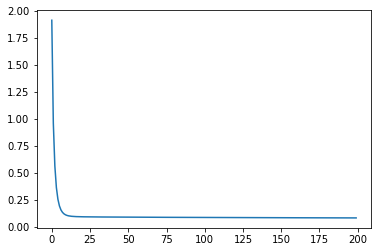

In [8]:
# run a training loop
# plot the costs
# and plot the final result
costs = []
for i in range(200):
  Z, Yhat = forward(X)
  W, b, V, c = update(X, Z, Y, Yhat, W, b, V, c)
  cost = get_cost(Y, Yhat)
  costs.append(cost)
  if i % 25 == 0:
    print(cost)

# plot the costs
plt.plot(costs)
plt.show()

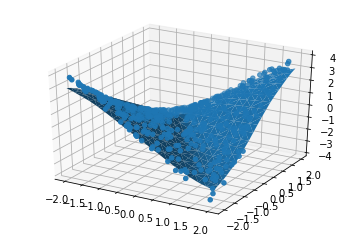

In [9]:
# plot the prediction with the data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-2, 2, 20)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
_, Yhat = forward(Xgrid)
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

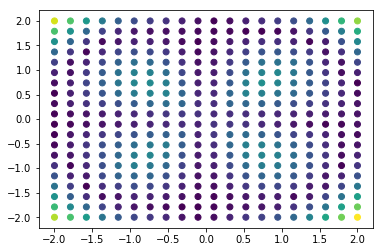

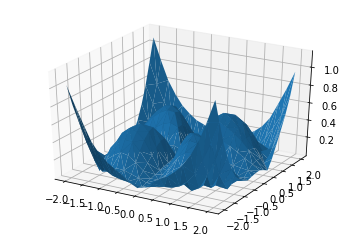

In [10]:
# plot magnitude of residuals
Ygrid = Xgrid[:,0]*Xgrid[:,1]
R = np.abs(Ygrid - Yhat)

plt.scatter(Xgrid[:,0], Xgrid[:,1], c=R)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], R, linewidth=0.2, antialiased=True)
plt.show()